In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving obama-white-house.csv to obama-white-house.csv
User uploaded file "obama-white-house.csv" with length 199928173 bytes


In [0]:

import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
import re
import sys
import nltk
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.stem.porter import *
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from gensim.models import word2vec

from sklearn.manifold import TSNE
from sklearn import metrics
import pandas as pd 
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import jaccard_similarity_score
cv = CountVectorizer()
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')



In [5]:
data = pd.read_csv('obama-white-house.csv', nrows=1000)
data.head(2)

,number,name,image,previous_office,presidency_url,party_affiliation,start_date,end_date,document_type_name,document_types_slug,title,url,content,document_date
0,44,Barack Obama,https://upload.wikimedia.org/wikipedia/commons...,U.S. Senator,https://en.wikipedia.org/wiki/Presidency_of_Ba...,Democratic,2009-01-20 00:00:00,2017-01-20 00:00:00,Statements and Releases,/briefing-room/statements-and-releases,FACT SHEET: United States – Argentina Relatio...,https://obamawhitehouse.archives.gov/the-press...,"President Obama, accompanied by First Lady Mic...",2016-03-23 00:00:00
1,44,Barack Obama,https://upload.wikimedia.org/wikipedia/commons...,U.S. Senator,https://en.wikipedia.org/wiki/Presidency_of_Ba...,Democratic,2009-01-20 00:00:00,2017-01-20 00:00:00,Statements and Releases,/briefing-room/statements-and-releases,FACT SHEET: U.S.-China Economic Relations,https://obamawhitehouse.archives.gov/the-press...,The United States and China recognize their sh...,2015-09-25 00:00:00


Text(0.5, 1.0, 'Title')

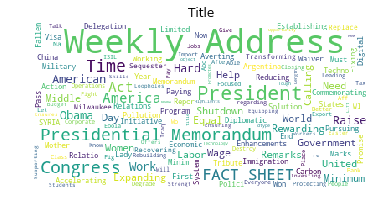

In [7]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
           background_color = 'white',
           stopwords = stopwords,
           max_words = 200,
           max_font_size = 40,
           random_state=42
    
       ).generate(str(data['title']))

plt.imshow(wordcloud)
plt.axis('off')
plt.title('Title')

Text(0.5, 1.0, 'Content')

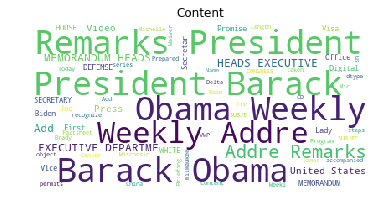

In [8]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
           background_color = 'white',
           stopwords = stopwords,
           max_words = 200,
           max_font_size = 40,
           random_state=42
    
       ).generate(str(data['content']))

plt.imshow(wordcloud)
plt.axis('off')
plt.title('Content')

In [0]:
# Data Cleaning
%timeit
def cleaning(s):
  s = str(s)
  s = s.lower()
  s = re.sub('\s\W',' ',s)
  s = re.sub('\W,\s',' ',s)
  s = re.sub(r'[^\w]', ' ', s)
  s = re.sub("\d+", "", s)
  s = re.sub('\s+',' ',s)
  s = re.sub('[!@#$_]', '', s)
  s = s.replace("co","")
  s = s.replace("https","")
  s = s.replace(",","")
  s = s.replace("[\w*"," ")
  return s

data['content'] = [cleaning(s) for s in data ['content']]
data['title'] = [cleaning(s) for s in data['title']]


# Stopwords removal
# data['content'] = data.apply(labmda row: nltk.word_tokenize(row['content']),axis=1)
# data['title'] = data.apply(lambda row: nltk.word_tokenize(row['content']),axis=1)

# data['content'] = data['content'].apply(labmda x: [item for item in x if item not in stop])
# data['title'] = data['title'].apply(lambda x: [item for item in x if item not in stop])



In [13]:
# Tfidf and Kmeans
vectorizer = TfidfVectorizer(stop_words='english', use_idf = True)
model = vectorizer.fit_transform(data['content'].str.upper())
km = KMeans(n_clusters=5, init='k-means++', max_iter=200, n_init=1)

k = km.fit(model)
terms = vectorizer.get_feature_names()
order_centroids = km.cluster_centers_.argsort()[:,::-1]

for i in range(5):
  print("cluster of words %d:" %i)
  for ind in order_centroids[i,:10]:
     print(' %s' % terms[ind])
      
  print()

cluster of words 0:
 ve
 jobs
 people
 americans
 enomy
 just
 american
 new
 make
 untry

cluster of words 1:
 section
 act
 secretary
 authority
 memorandum
 united
 states
 determination
 defense
 state

cluster of words 2:
 united
 states
 agreement
 dear
 secretary
 nuclear
 mr
 security
 senate
 forces

cluster of words 3:
 emergency
 national
 declared
 notice
 ntinue
 respect
 executive
 order
 threat
 stating

cluster of words 4:
 agencies
 memorandum
 shall
 director
 federal
 departments
 agency
 executive
 office
 sec



In [15]:
# Building corpurs from title and contents
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['title', 'content']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

corpus = build_corpus(data)        
corpus[0:2]

[['fact', 'sheet', 'united', 'states', 'argentina', 'relationship'],
 ['fact', 'sheet', 'u', 's', 'china', 'enomic', 'relations']]

In [0]:
# words to vector
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=400, workers=4)


In [22]:
model.wv['obama']

array([ 1.48498690e+00, -1.12010539e+00,  1.41380608e+00,  4.82179254e-01,
       -2.05242848e+00, -4.09076154e-01, -5.05169749e-01,  4.49018449e-01,
       -8.29599619e-01,  6.75284326e-01, -3.90973575e-02, -1.39249980e+00,
        1.66675651e+00,  1.01143193e+00,  4.65266585e-01, -8.09224844e-01,
       -2.41675401e+00,  7.18620699e-03,  3.50159138e-01, -1.47119725e+00,
       -1.82176024e-01,  1.12545431e+00,  2.80792803e-01,  1.46257654e-01,
        3.89673501e-01,  1.41365826e+00,  1.38957429e+00, -1.98388112e+00,
        1.07033245e-01, -5.52977264e-01,  1.88173139e+00, -4.35989559e-01,
        2.21630216e+00, -6.97530866e-01,  7.49508142e-01, -1.35501337e+00,
        2.11687326e-01, -1.73144984e+00,  7.50609457e-01,  1.13934748e-01,
       -7.63164699e-01,  5.68347145e-03, -8.55312586e-01, -2.11542988e+00,
       -1.22162998e+00, -1.58714071e-01, -3.53619963e-01,  5.91097653e-01,
        6.12257838e-01, -7.68405139e-01, -2.88077998e+00,  5.62497616e-01,
        2.92524397e-01, -

In [0]:
# Data Visualization
def tsne_plot(model):
  labels = []
  tokens = []
  
  for word in model.wv.vocab:
    tokens.append(model[word])
    labels.append(word)
    
  tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
  new_values = tsne_model.fit_transform(tokens)

  
  x = []
  y = []
  
  for value in new_values:
    x.append(value[0])
    y.append(value[1])
    
  plt.figure(figsize=(16, 16))
  
  for i in range(len(x)):
    plt.scatter(x[i], y[i])
    plt.annotate(labels[i],
               xy = (x[i], y[i]),
               xytext = (5,2),
               textcoords='offset points',
               ha = 'right',
               va = 'bottom')
    
  plt.show()

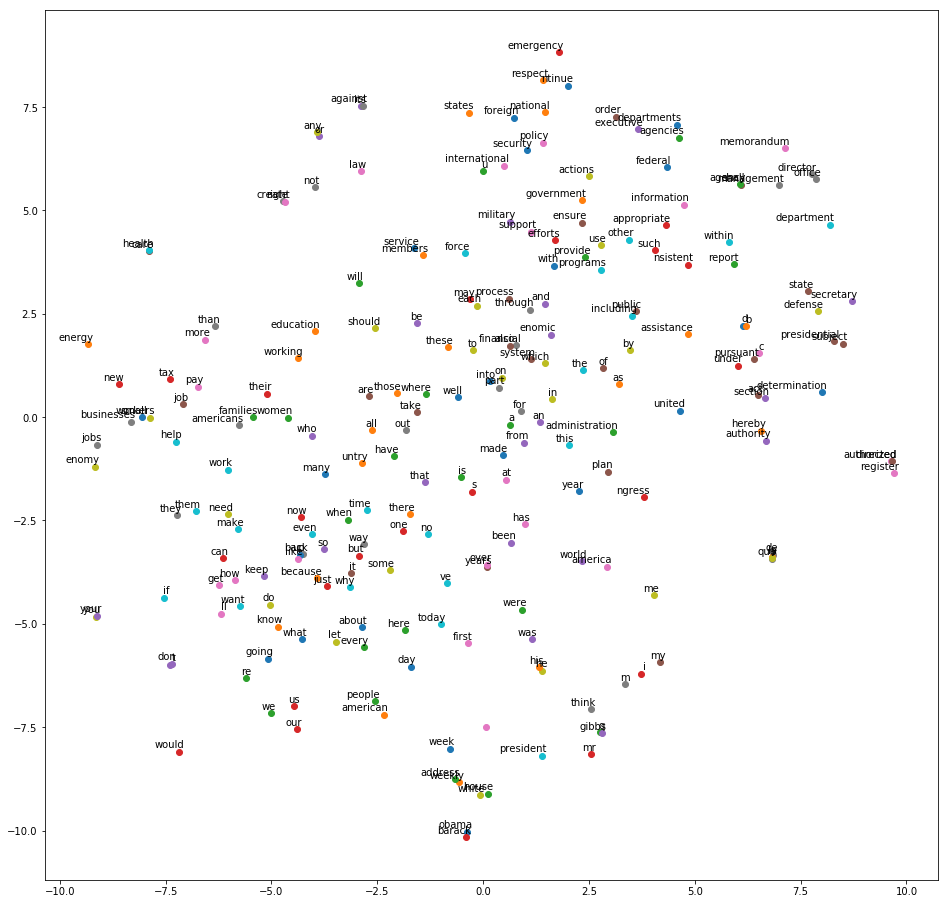

In [28]:
tsne_plot(model)